# ***Report of Analysis of Loan Data and Modeling Default***


### ***Install Packages***

In [2]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install google-colab
!pip install imbalanced-learn


##### **Explanation**
We install the required libraries so that we can do analysis on the data provides the breakdown of the libraries is as follows
- Pandas:
  this is the one used to work with the data and transform it into data structure we can work with programmatically
- Scikit-learn: this library provides the different statistical models from the sklearn cataloged of models which includes logistic regression we shall use to model the classification
-  Google Colab: this library provides the interface and tools we need to work with Google services which like Google Drive to store out data that the raw data is persisted
- imbalanced-learn library: it relays on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes. It helps in balancing the datasets which are highly skewed or biased towards some classes. Thus, it helps in resampling the classes which are otherwise oversampled or under-sampled.


### ***Importing libraries***


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline



##### **Explanation**
Here we import the tools we need to work with the analysis of the data, for the python notebook

### ***Generate Random SEED and RandomState***

In [4]:
# Generate random SEED
np.random.seed(2023)
SEED = int((np.random.rand()) * (14 + 8))
STATE = np.random.mtrand.RandomState(SEED)
print(SEED)
print(STATE)

7
RandomState(MT19937)


##### **Explanation**
The randomstate and seed are needed mainly for reproducibility of the random numbers on each run since we are using multiple models and comparing, this best practice to set a seed and random state so that the results are consistent across the different models

### ***Load the data from local repository***

In [5]:
# load the required data
PATH = './data/'
data = pd.read_excel(os.path.join(PATH,'michaelgoboola.xlsx'), sheet_name='Data')
data.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


##### **Explanation**

With this block of code, we load the data from out local repository (local hard drive)
we define the directory path containing our data and use pandas to read_excel() method to get the data, and then view the data with the head() from the data frame.

### ***Load date from Google Drive***

In [ ]:
# load data from  google drive
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/data/'
data = pd.read_excel(os.path.join(PATH,'michaelgoboola.xlsx'), sheet_name='Data') # change path to your path
data.head()

Mounted at /content/drive


,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


##### **Explanation**
Alternatively, when using google colab we use the colab libray here to mount our remote drive associated with out google account (google drive)and then define the directory path where we have our data file, we use the pandas, read_excel() method to read the excel data into a dataframe, then call the head() method to view the first 5 rows of the data to ensure we have data.

### ***Data Preprocessing, Cleaning and Validation***

In this section, we do the following as accorded in the instructions
- Data validation
- Data Preprocessing
- Check for multicolinearity
- Prepare the data for Modeling

#### ***Data Validation***

##### *Data Type Check*

In [6]:
# data type check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

###### **Explanation**
Here we check for the data types that and validate if they conform to wat we expect and we use the dypes on the pandas dataframe to establish that.

we expect the data to be of integer and categorical to be of object type. It has 32 columns all od integer type.

##### *Check for missing values*

In [7]:
# check for missing values
data.isna().sum()

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

###### **Explanation**
Here we look for empty data points which shows that the data we have here
is all having required data types

##### Check for repeated values

In [8]:
# check for repeated values
data.duplicated().sum()

0

###### **Explanation**
Here we do check for data points that are duplicate
and its data shows that we don't have any which indicates, so we can proceed.

#### ***Data Preprocessing***

#####  *Setup target variable*

In [9]:
# setup target variable
target =  ['OBS#','RESPONSE']
data_target = data[target]
data_target.head()

,OBS#,RESPONSE
0,1,1
1,2,0
2,3,1
3,4,1
4,5,0


###### **Explanation**
- We model default for loans as the variable response which classifies the credit rating of the individual observed in the data.

- The variable response is used aa proxy of default in the sense that id on has bad credit rating, then they are likely to default and the reverse is true for a good rating.

##### *List Numeric Columns*

In [10]:
# list numeric columns
numericals =['DURATION', 'AMOUNT',
             'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'NUM_DEPENDENTS']

numericals

['DURATION', 'AMOUNT', 'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'NUM_DEPENDENTS']

###### **Explanation**
Here extract the numerical columns

##### *List Categorical Columns*

In [11]:
# list categorical columns
categoricals =['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR',
               'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING',
               'SAV_ACCT', 'EMPLOYMENT', 'MALE_DIV', 'MALE_SINGLE',
               'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
               'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT',
               'OWN_RES', 'JOB', 'TELEPHONE',
               'FOREIGN', 'RESPONSE']
categoricals

['CHK_ACCT',
 'HISTORY',
 'NEW_CAR',
 'USED_CAR',
 'FURNITURE',
 'RADIO/TV',
 'EDUCATION',
 'RETRAINING',
 'SAV_ACCT',
 'EMPLOYMENT',
 'MALE_DIV',
 'MALE_SINGLE',
 'MALE_MAR_or_WID',
 'CO-APPLICANT',
 'GUARANTOR',
 'PRESENT_RESIDENT',
 'REAL_ESTATE',
 'PROP_UNKN_NONE',
 'OTHER_INSTALL',
 'RENT',
 'OWN_RES',
 'JOB',
 'TELEPHONE',
 'FOREIGN',
 'RESPONSE']

###### **Explanation**
Here we extract the coded categorical columns

##### *Check for outliers*

In [12]:
# check for outliers
data[numericals].describe()

,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000


In [13]:
data[numericals].skew()

DURATION          1.094184
AMOUNT            1.949628
INSTALL_RATE     -0.531348
AGE               1.020739
NUM_CREDITS       1.272576
NUM_DEPENDENTS    1.909445
dtype: float64

###### **Explanation**
- Doing a description of the data and evaluation of the skewness, it suggests that the data is relatively highly skewed with values slightly above 1.
- This suggests that the data may be imbalanced structure with some classes being over-represented than the others.

##### *Check for data distribution for numerical variables*

array([[<Axes: title={'center': 'DURATION'}>,
        <Axes: title={'center': 'AMOUNT'}>],
       [<Axes: title={'center': 'INSTALL_RATE'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'NUM_CREDITS'}>,
        <Axes: title={'center': 'NUM_DEPENDENTS'}>]], dtype=object)

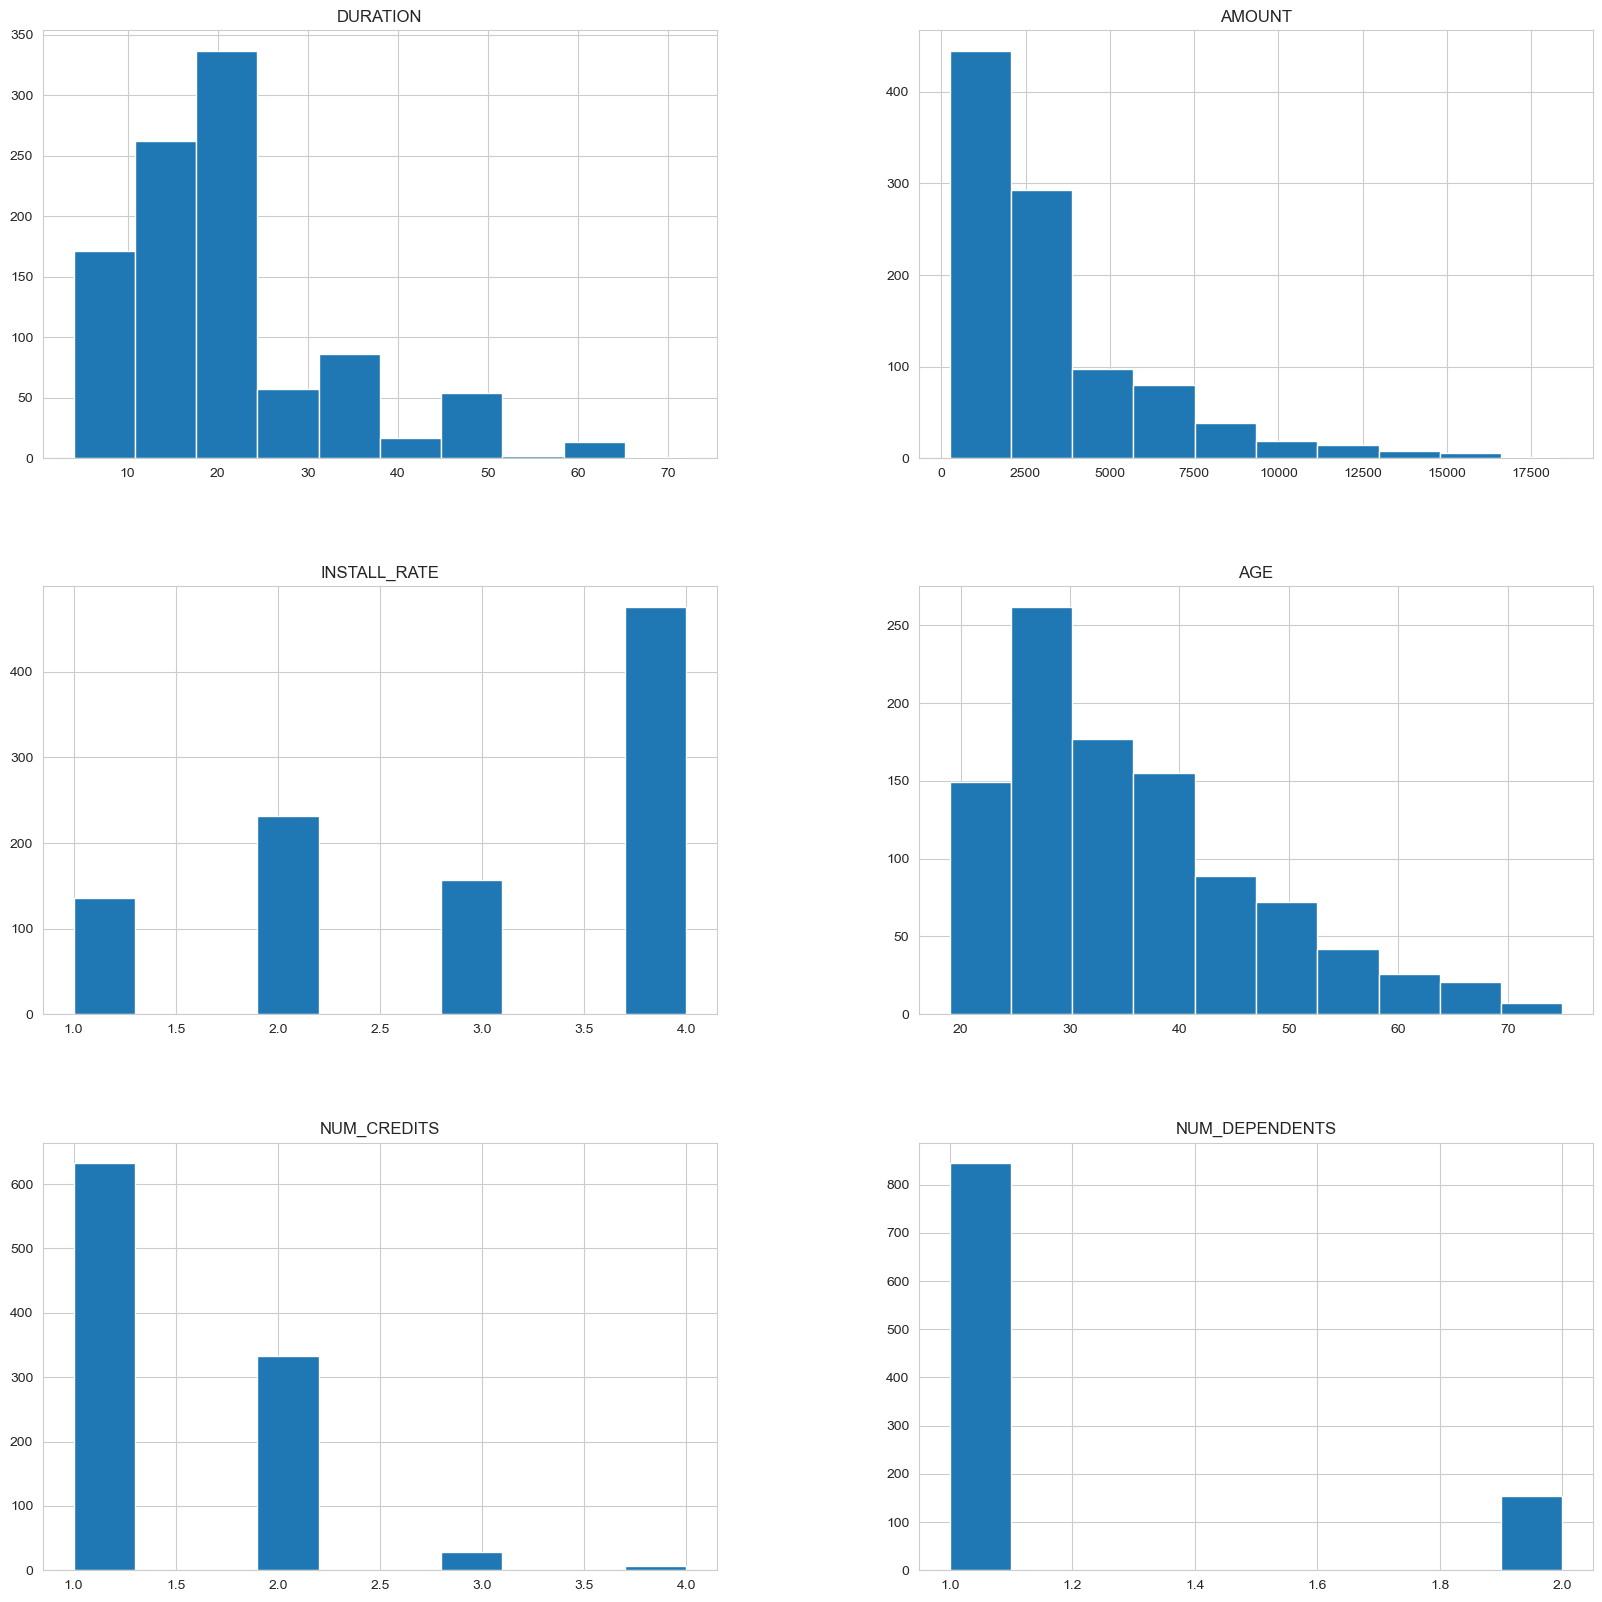

In [14]:
# check for data distribution for numerical variables
data[numericals].hist(figsize=(20,20))

###### **Explanation**

The histogram plots above seem to suggest the same thing like that of the numerical skew values which means a bit of an imbalance in the struture of the data. We shall go ahead and establish the linear relationships between these features.

##### *Check for correlation between variables*

In [15]:
# check for correlation between variables
data[numericals].corr()

,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS
DURATION,1.000000,0.624984,0.074749,-0.036136,-0.011284,-0.023834
AMOUNT,0.624984,1.000000,-0.271316,0.032716,0.020795,0.017142
INSTALL_RATE,0.074749,-0.271316,1.000000,0.058266,0.021669,-0.071207
AGE,-0.036136,0.032716,0.058266,1.000000,0.149254,0.118201
NUM_CREDITS,-0.011284,0.020795,0.021669,0.149254,1.000000,0.109667
NUM_DEPENDENTS,-0.023834,0.017142,-0.071207,0.118201,0.109667,1.000000


#### ***Multiconlinearity***

##### *Check for multicollinearity*

<Axes: >

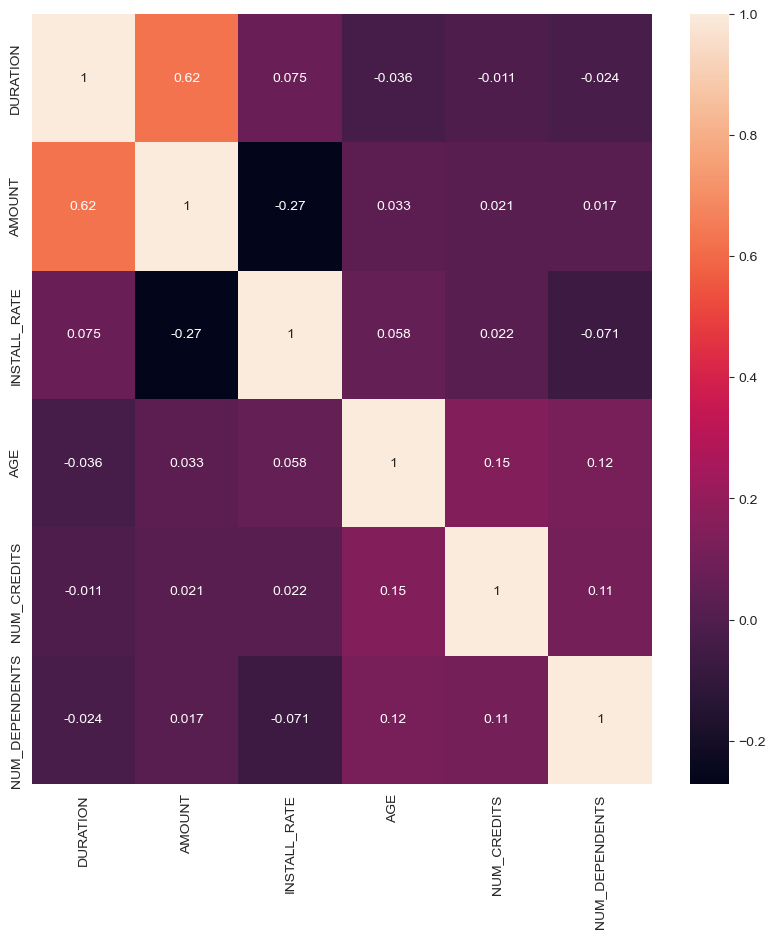

In [16]:
# check for multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(data[numericals].corr(), annot=True)

###### **Explanation**
The heatmap above shows the correlation between the numerical variables and it shows that there is no multicolinearity between the variables. because the correlation between the variables is not very high.
so the data is good to go for modeling. with less transformation.

##### *Check for data distribution for target variable*

In [17]:
# check for data distribution for target variable
data_target['RESPONSE'].value_counts()

1    700
0    300
Name: RESPONSE, dtype: int64

###### **Explanation**
The data distribution for the target variable shows that the data is imbalanced with the majority of the data being 1 which is 700 and the minority being 0 which is 300. This is an indication that the data is imbalanced, and we shall use the SMOTE method to balance the data.

##### *Check for Counts for Categorical variables*

In [18]:
# Count and Plot The Hists for Categorically
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

3    394
0    274
1    269
2     63
Name: CHK_ACCT, dtype: int64


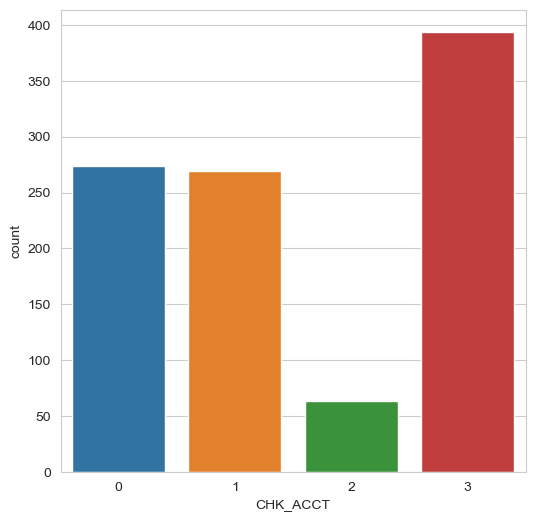

In [19]:
# CHK_ACCT
categorical_valcount_hist(categoricals[0])

###### **Explanation**
Majority of the people have no checking account

2    530
4    293
3     88
1     49
0     40
Name: HISTORY, dtype: int64


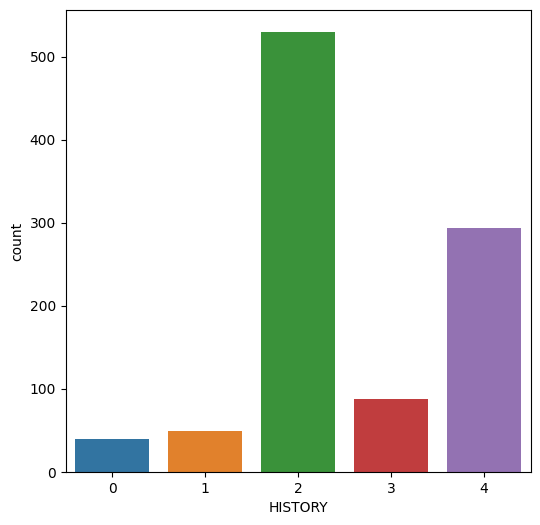

In [ ]:
# History
categorical_valcount_hist(categoricals[1])

###### **Explanation**
The existing credit history is good with the majority have duely paid their dues till date

0    766
1    234
Name: NEW_CAR, dtype: int64


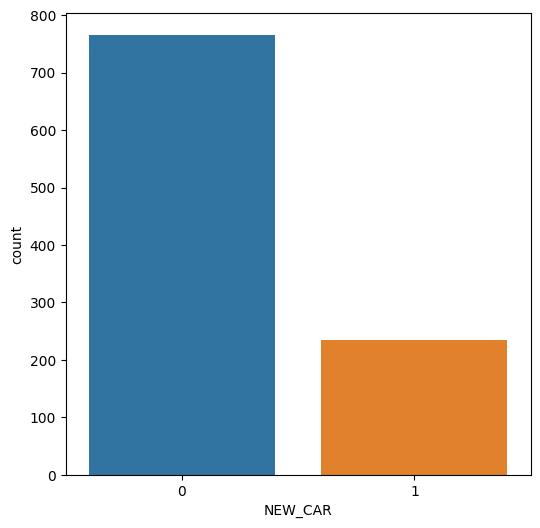

In [ ]:
# New car
categorical_valcount_hist(categoricals[2])

###### **Explanation**
The majority of the loans are not buy new cars

0    897
1    103
Name: USED_CAR, dtype: int64


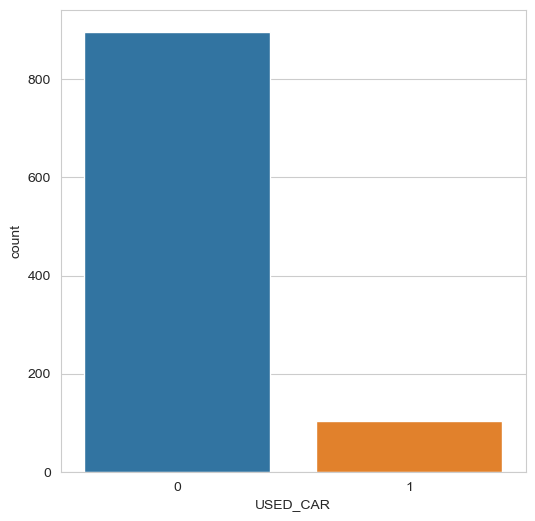

In [20]:
# Used Car
categorical_valcount_hist(categoricals[3])

###### **Explanation**
The majority of the loans are not to buy used cars

0    819
1    181
Name: FURNITURE, dtype: int64


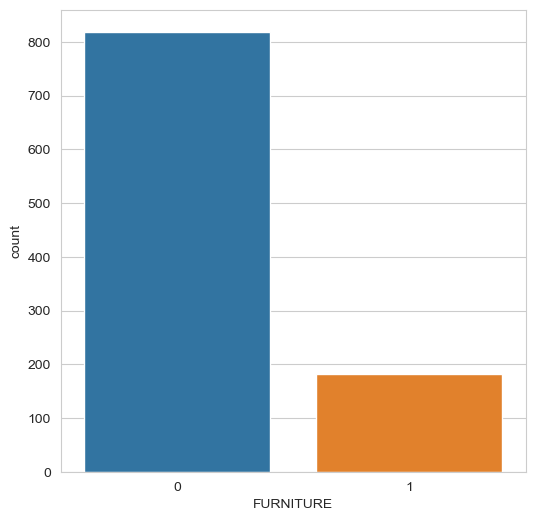

In [21]:
# Furniture
categorical_valcount_hist(categoricals[4])

###### **Explanation**
The majority of the loans are not to buy furniture

0    720
1    280
Name: RADIO/TV, dtype: int64


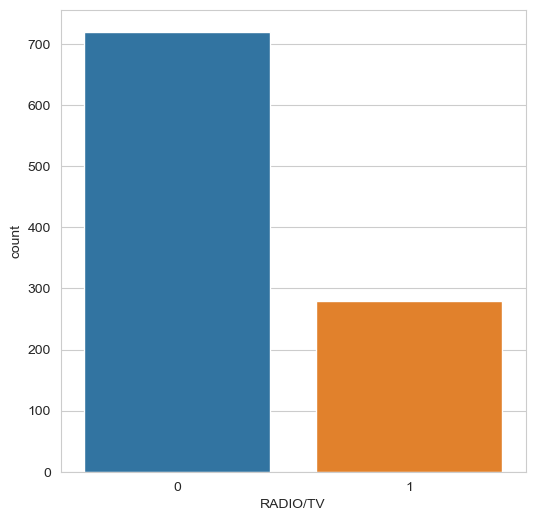

In [22]:
# Radio/ Tv
categorical_valcount_hist(categoricals[5])

###### **Explanation**
The majority of the loans are not to buy Radio/TV

0    950
1     50
Name: EDUCATION, dtype: int64


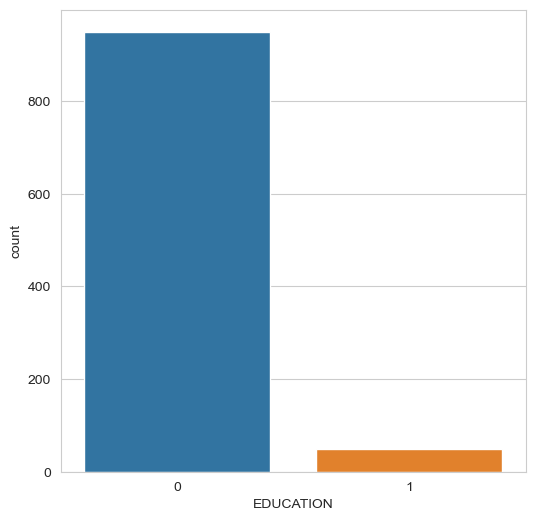

In [23]:
#Education
categorical_valcount_hist(categoricals[6])

###### **Explanation**
The majority of the loans are not for education

0    903
1     97
Name: RETRAINING, dtype: int64


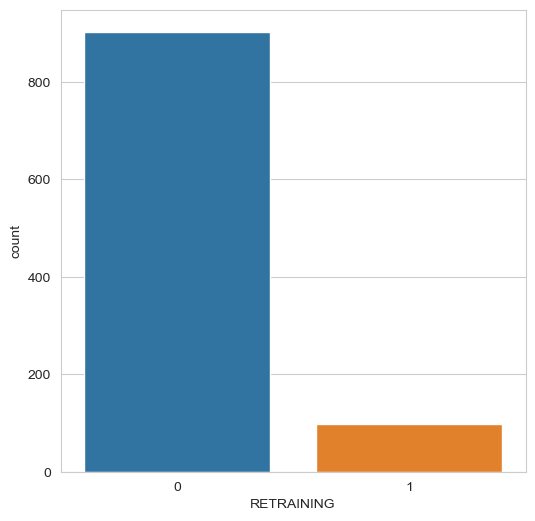

In [24]:
# Retraining
categorical_valcount_hist(categoricals[7])

###### **Explanation**
The majority of the loans are not for retraining

0    603
4    183
1    103
2     63
3     48
Name: SAV_ACCT, dtype: int64


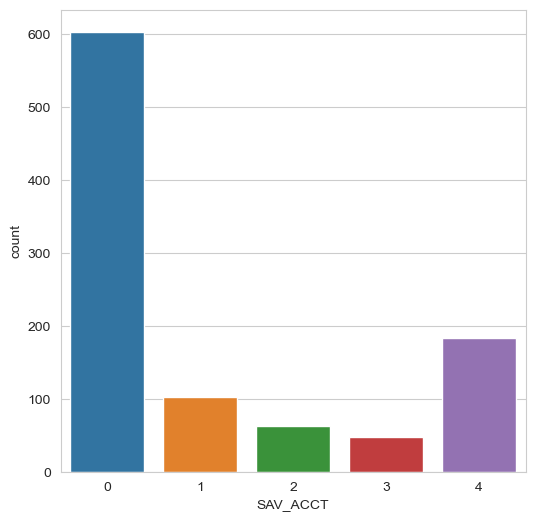

In [25]:
# average balance in saving account
categorical_valcount_hist(categoricals[8])

###### **Explanation**
The majority of saving account  is less than 100 DM

2    339
4    253
3    174
1    172
0     62
Name: EMPLOYMENT, dtype: int64


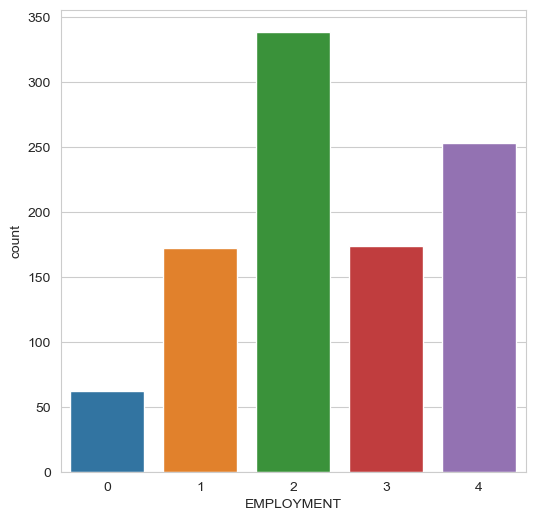

In [26]:
# Employment
categorical_valcount_hist(categoricals[9])

###### **Explanation**
Majority of the people are employed for more than 1 year and less than 4 years

0    950
1     50
Name: MALE_DIV, dtype: int64


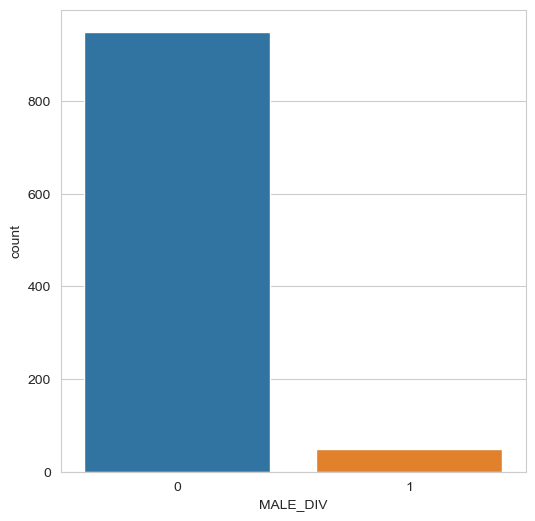

In [27]:
# Male and Divorced
categorical_valcount_hist(categoricals[10])

###### **Explanation**
Majority of Loans are taken  by males  who are not divorced

1    548
0    452
Name: MALE_SINGLE, dtype: int64


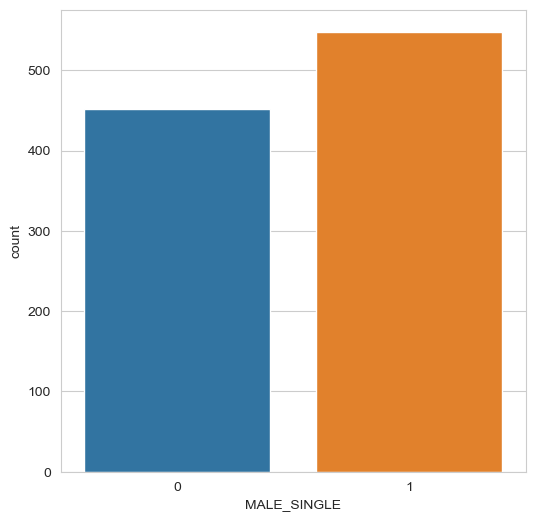

In [28]:
# Male and Single
categorical_valcount_hist(categoricals[11])

###### **Explanation**
Majority of the loans are taken by single men

0    908
1     92
Name: MALE_MAR_or_WID, dtype: int64


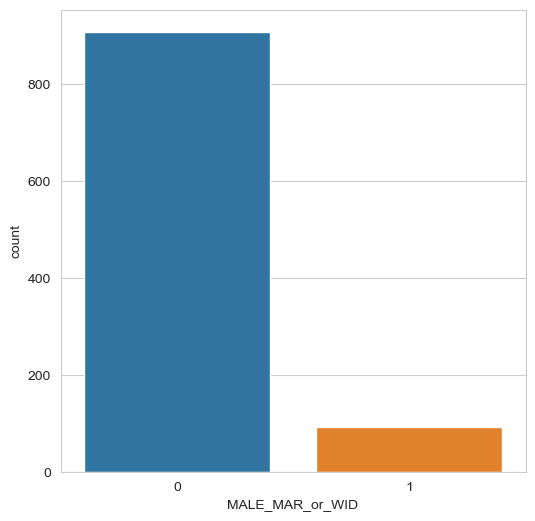

In [29]:
# Male married or Widowed
categorical_valcount_hist(categoricals[12])

###### **Explanation**
Majority of the males who take the loans are not married or widowers

0    959
1     41
Name: CO-APPLICANT, dtype: int64


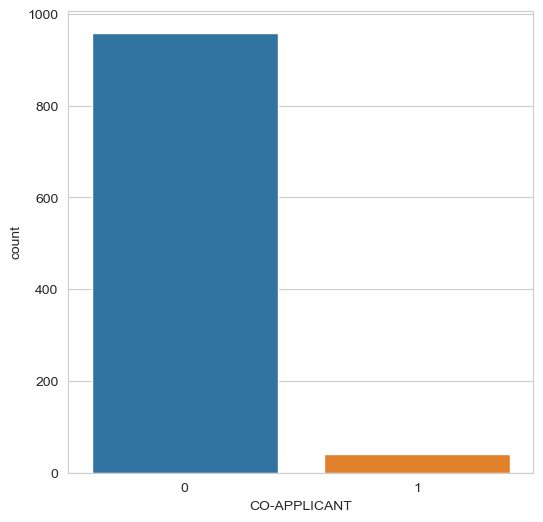

In [30]:
# Co-Applicant
categorical_valcount_hist(categoricals[13])

###### **Explanation**
Majority of the loans applications have no  co-applicant

0    948
1     52
Name: GUARANTOR, dtype: int64


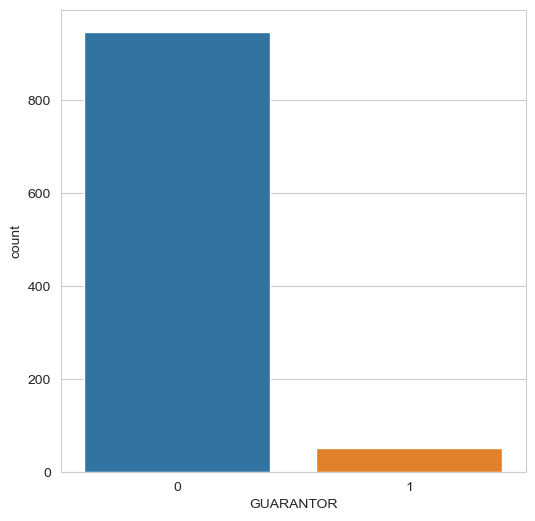

In [31]:
# Guarantor
categorical_valcount_hist(categoricals[14])

###### **Explanation**
Majority of the loans applications have no guarantor

4    413
2    308
3    149
1    130
Name: PRESENT_RESIDENT, dtype: int64


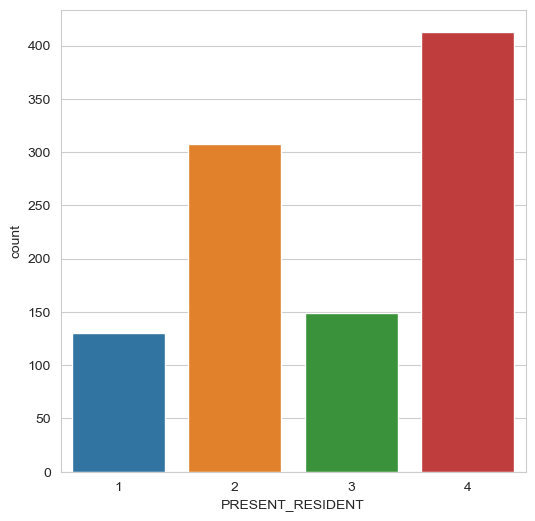

In [32]:
# Present Resident
categorical_valcount_hist(categoricals[15])

###### **Explanation**
Majority of the loans applications have been residents for more than 1 year and less than 4 years

0    718
1    282
Name: REAL_ESTATE, dtype: int64


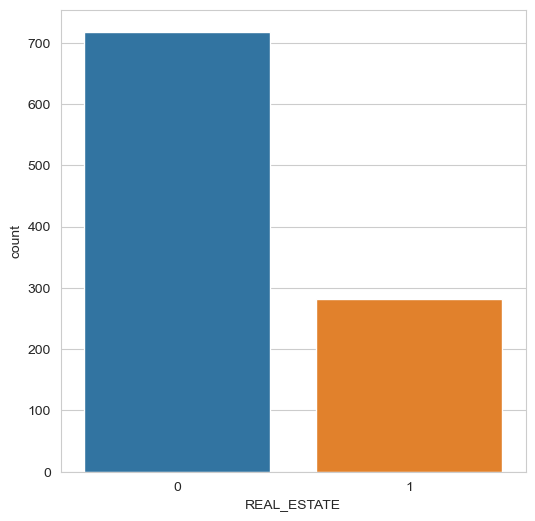

In [33]:
# Real Estate
categorical_valcount_hist(categoricals[16])

###### **Explanation**
Majority of the loans applicants have no real estate property ownership

0    846
1    154
Name: PROP_UNKN_NONE, dtype: int64


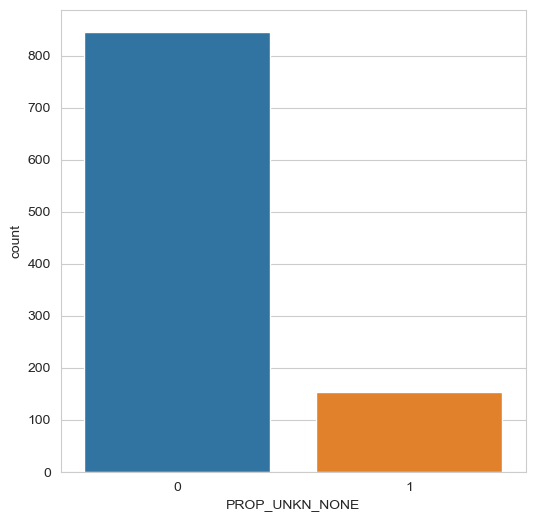

In [34]:
# PROP_UNKN_NONE
categorical_valcount_hist(categoricals[17])

###### **Explanation**
Majority of the loans applicants have no property ownership

0    814
1    186
Name: OTHER_INSTALL, dtype: int64


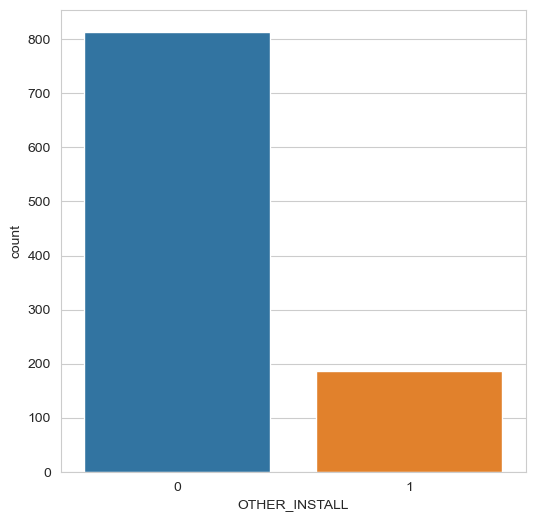

In [35]:
# Other installment
categorical_valcount_hist(categoricals[18])

###### **Explanation**
Majority of the loans applicants have no other installment plan associated with the loan

0    821
1    179
Name: RENT, dtype: int64


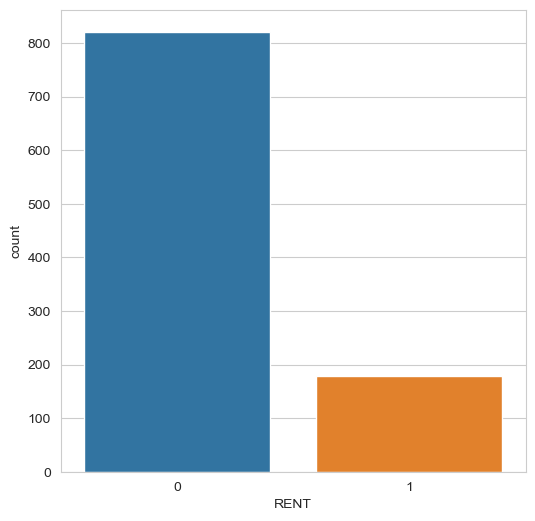

In [36]:
# Rents a residence
categorical_valcount_hist(categoricals[19])

###### **Explanation**
Majority of the loans applicants don't rent a residence

1    713
0    287
Name: OWN_RES, dtype: int64


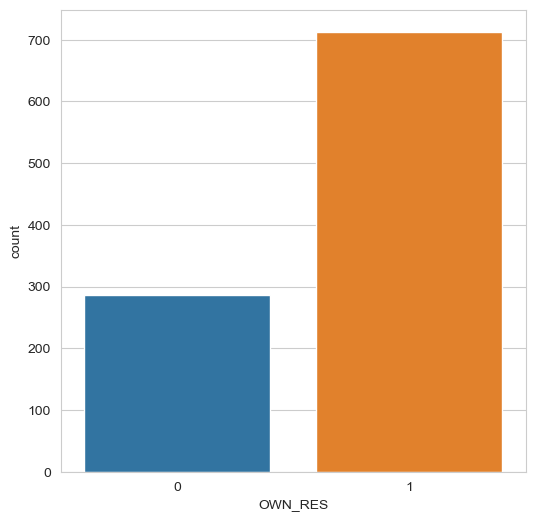

In [37]:
# Owns Residence
categorical_valcount_hist(categoricals[20])

###### **Explanation**
Majority of the loans applicants actually do own a residence

2    630
1    200
3    148
0     22
Name: JOB, dtype: int64


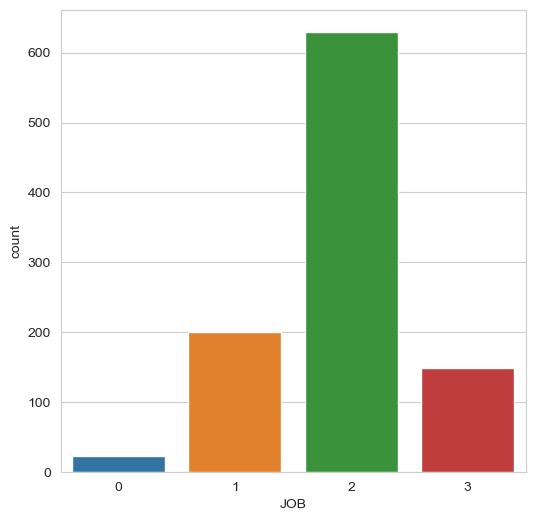

In [38]:
# JOB
categorical_valcount_hist(categoricals[21])

###### **Explanation**
Majority of the loans applicants are skilled employees with skilled/office jobs

0    596
1    404
Name: TELEPHONE, dtype: int64


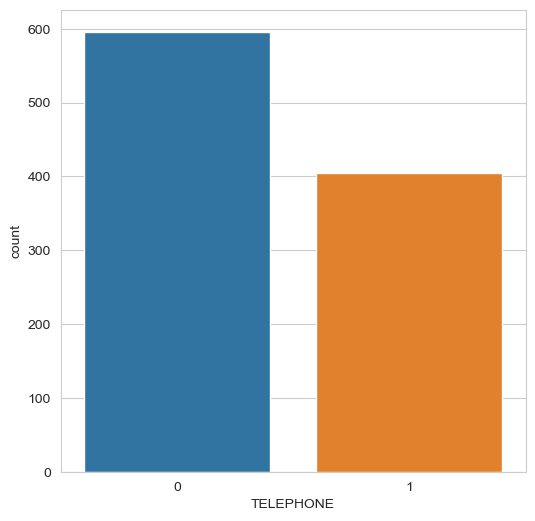

In [39]:
# Telephone
categorical_valcount_hist(categoricals[22])

###### **Explanation**
Majority of the loans applicants have phone in their name


0    963
1     37
Name: FOREIGN, dtype: int64


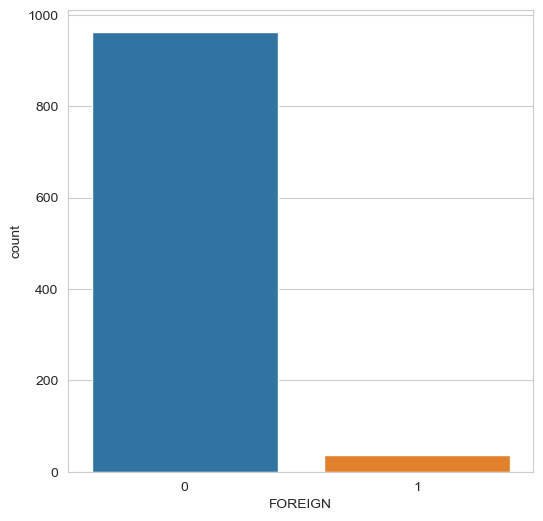

In [40]:
# Foreign
categorical_valcount_hist(categoricals[23])

###### **Explanation**
The majority of the loans are not foreign meaning they are domestic to the lending party

## ***Model building***

In machine learning, model building is the process of creating a mathematical representation of a real-world process. The goal of model building is to create a model that can accurately predict the outcome of a given process based on input data. Machine learning models are created from machine learning algorithms, which are trained using either labeled, unlabeled, or mixed data. Different machine learning algorithms are suited to different goals, such as classification or prediction modeling, so data scientists use different algorithms as the basis for different models.
<br>
<br>
The problem we modeling, now is to predict default on the loans or not default, the target variable is binary. This fits in the category of models which are classification models. With this we shall model with 3 models that are

- LogisticsRegression
- KNearestNeighbours
- RandomForestClassifier <br>

The choice of the model and modeling is based on few assumptions we make about the nature of our data and these assumptions include,

1. The Target Variable (Response) is a categorical variable and in out case, binany in nature which is proxy for default based on the credit score
2. The independent variables are not multicolinear
3. The data is not very higghly skewed <br>
4. There are no extreme outliers.
5. There exists a linear relationship between each explanatory variable and the logit of the response variable.
6. The sample size is sufficiently large.

the choice of the model here is the logistics regression model from the sklearn model. And then we model using the data which is prepared.
we shall select the best model based on the f- score. Then conclude accordingly

### ***Prepare the Data for modeling***

In [ ]:
# Split the data for Test and Training

# split data
X_train, X_test, y_train, y_test = train_test_split(data.drop(['OBS#','RESPONSE'], axis=1),
                                                    data['RESPONSE'],
                                                    test_size=0.3,
                                                    random_state=0)

# categorical columns
cols = ['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR',
               'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING',
               'SAV_ACCT', 'EMPLOYMENT', 'MALE_DIV', 'MALE_SINGLE',
               'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
               'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT',
               'OWN_RES', 'JOB', 'TELEPHONE',
               'FOREIGN']
# get the dummies for categorical data
x_train = pd.get_dummies(X_train, columns=cols, drop_first=True)
Y_train = pd.get_dummies(y_train, columns=cols, drop_first=True)
x_test = pd.get_dummies(X_test, columns=cols, drop_first=True)
Y_test = pd.get_dummies(y_test, columns=cols, drop_first=True)


###### **Explanation**
To prepare the data for modeling we have to extract the target variable and remain with the features that we shall use in the model. <br>

To achieve this we used the sklearn method of train_test_split to split the data into 70% of training and 30% to test he model to evaluate its accuracy <br>

The other is to generate dummies for he categorical features to increase variable visibility, to do this we used the pd.get_dummies to do that.

### ***Modeling using the LogisticRegression Classifier***

In [ ]:
# model building with  LogisticRegression Classifier
# model
model = LogisticRegression()
# fit model
smote_sampler = SMOTE(random_state=STATE)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', model]])
pipeline.fit(X_train, y_train)

# test model
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### **Explanation**
With modeling we add step where we define the smote_sampler which is used to balance the data, to do this we use the pipeline utility from the imblearn library and add the smote_sampler and the classifier which is the RandomForestClassifier. Then we fit the model and predict the test data.

**NOTE**

SMOTE stands for Synthetic Minority Over-sampling Technique. It is a method to balance class distribution in a dataset by creating new samples of the minority class12. A smote_sampler is an object that performs this technique on a given dataset. It is used in the pipeline to balance the dataset before fitting the model.

In [ ]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------CLASSIFICATION REPORT -----------------------")
print(classification_report(y_test, y_pred))
print("-------------------------TEST SCORES-----------------------")
print(f"confusion matrix : { confusion_matrix(y_test, y_pred)}")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------CLASSIFICATION REPORT -----------------------
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        86
           1       0.85      0.76      0.80       214

    accuracy                           0.74       300
   macro avg       0.69      0.72      0.70       300
weighted avg       0.76      0.74      0.74       300

-------------------------TEST SCORES-----------------------
confusion matrix : [[ 58  28]
 [ 51 163]]
Recall: 76.1682
Precision: 85.3403
F1-Score: 80.4938
Accuracy score: 73.6667
AUC Score: 71.805


###### **Explanation**
The results of this model are interpreted below

- **Confusion Matrix** - the highlight here is the false positives which indicate the number of times we have predicted a default to be not a default and these are 51 compared to the false negatives of 28
- **Precision** — What percent of your predictions were correct? and this is 85% of all the prediction, and this is calculated as
Precision = **TP/(TP + FP)**

- **Recall** — What percent of the default cases (Bad credit score cases that are likely to default) did the model catch and this is 76% which means that we are pretty doing well on the data we have, and this is calculated with
Recall = **TP/(TP+FN)**

- **F1 score** — What percent of positive predictions were correct?, basically how did the model perform on predicting whether default or not default and this is 80% of the time. this means that the model fits the data well and could predict cases of default
F1 Score = **2*(Recall * Precision) / (Recall + Precision)**

- **Accuracy score** - The overall accuracy of the model us 74% based on the data provided.

### ***Modeling using K-nearest Neighbours (KNN)***

In [ ]:
# modeling using the K-nearest Neighbours (KNN)
knn = KNeighborsClassifier()

# fit the model
smote_sampler = SMOTE(random_state=STATE)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', knn]])

pipeline.fit(X_train, y_train)

# test model

pred = pipeline.predict(X_test)

###### **Explanation**
With modeling we add step where we define the smote_sampler which is used to balance the data, to do this we use the pipeline utility from the imblearn library and add the smote_sampler and the classifier which is the RandomForestClassifier. Then we fit the model and predict the test data.

**NOTE**

SMOTE stands for Synthetic Minority Over-sampling Technique. It is a method to balance class distribution in a dataset by creating new samples of the minority class12. A smote_sampler is an object that performs this technique on a given dataset. It is used in the pipeline to balance the dataset before fitting the model.

In [ ]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------CLASSIFICATION REPORT -----------------------")
print(classification_report(y_test, pred))
print("-------------------------TEST SCORES-----------------------")
print(f"confusion matrix : {confusion_matrix(y_test, pred)}")
print(f"Recall: { round(recall_score(y_test, pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, pred)*100, 4) }")

-------------------------CLASSIFICATION REPORT -----------------------
              precision    recall  f1-score   support

           0       0.35      0.51      0.42        86
           1       0.76      0.62      0.68       214

    accuracy                           0.59       300
   macro avg       0.56      0.57      0.55       300
weighted avg       0.64      0.59      0.61       300

-------------------------TEST SCORES-----------------------
confusion matrix : [[ 44  42]
 [ 81 133]]
Recall: 62.1495
Precision: 76.0
F1-Score: 68.3805
Accuracy score: 59.0
AUC Score: 56.6562


###### **Explanation**
The results of this model are interpreted below

- **Confusion Matrix** - the highlight here is the false positives which indicate the number of times we have predicted a default to be not a default and these are relatively high at 81 compared to what the previous model produced which is not a good sign of model reliability
- **Precision** — What percent of your predictions were correct? and this is 76% of all the prediction, and this is calculated as
Precision = **TP/(TP + FP)**

- **Recall** — What percent of the default cases (Bad credit score cases that are likely to default) did the model catch and this is 62% which means that we are pretty doing well on the data we have, and this is calculated with
Recall = **TP/(TP+FN)**

- **F1 score** — What percent of positive predictions were correct?, basically how did the model perform on predicting whether default or not default and this is 68% of the time. this means that the model fits the data well and could predict cases of default
F1 Score = **2*(Recall * Precision) / (Recall + Precision)**

- **Accuracy score** - The overall accuracy of the model us 59% based on the data provided. This indicates that the model didn't perform well on the data.

### ***Modeling Using the RandomForestClassifier***

In [ ]:
# modeling using the RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)

smote_sampler = SMOTE(random_state=STATE)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])

pipeline.fit(X_train, y_train)

y_pred_c = pipeline.predict(X_test)

###### **Explanation**
With modeling we add step where we define the smote_sampler which is used to balance the data, to do this we use the pipeline utility from the imblearn library and add the smote_sampler and the classifier which is the RandomForestClassifier. Then we fit the model and predict the test data.

**NOTE**

SMOTE stands for Synthetic Minority Over-sampling Technique. It is a method to balance class distribution in a dataset by creating new samples of the minority class12. A smote_sampler is an object that performs this technique on a given dataset. It is used in the pipeline to balance the dataset before fitting the model.

-------------------------CLASSIFICATION REPORT -----------------------
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        86
           1       0.83      0.80      0.82       214

    accuracy                           0.74       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.75      0.74      0.75       300

-------------------------TEST SCORES-----------------------
confusion matrix : [[ 51  35]
 [ 42 172]]
Recall: 80.3738
Precision: 83.0918
F1-Score: 81.7102
Accuracy score: 74.3333
AUC Score: 69.8381


<Axes: >

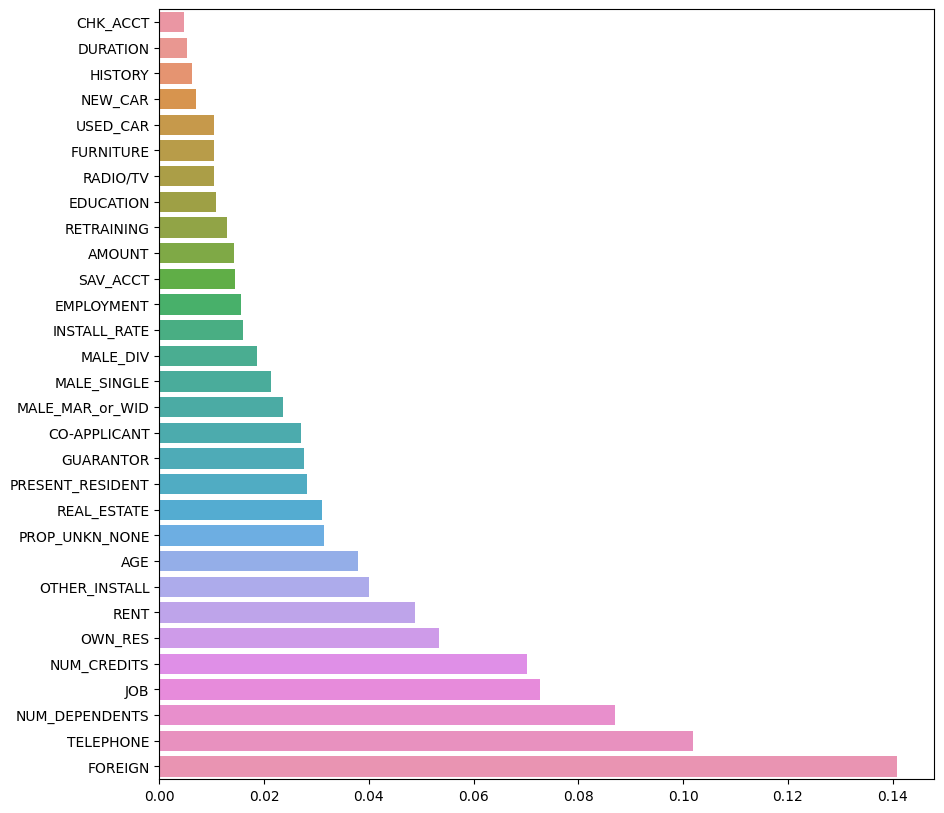

In [ ]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------CLASSIFICATION REPORT -----------------------")
print(classification_report(y_test, y_pred_c))
print("-------------------------TEST SCORES-----------------------")
print(f"confusion matrix : {confusion_matrix(y_test, y_pred_c)}")
print(f"Recall: { round(recall_score(y_test, y_pred_c)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred_c)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred_c)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred_c)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred_c)*100, 4) }")

# plot feature importance

plt.figure(figsize=(10,10))
sns.barplot(x=np.sort(rf_clf.feature_importances_), y=rf_clf.feature_names_in_,orient='h')



###### **Explanation**
The results of this model are interpreted below

- **Confusion Matrix** - the highlight here is the false positives which indicate the number of times we have predicted a default to be not a default and these are 42 compared to the false negatives of 35
- **Precision** — What percent of your predictions were correct? and this is 83% of all the prediction, and this is calculated as
Precision = **TP/(TP + FP)**

- **Recall** — What percent of the default cases (Bad credit score cases that are likely to default) did the model catch and this is 80% which means that we are pretty doing well on the data we have, and this is calculated with
Recall = **TP/(TP+FN)**

- **F1 score** — What percent of positive predictions were correct?, basically how did the model perform on predicting whether default or not default and this is 81% of the time. this means that the model fits the data well and could predict cases of default
F1 Score = **2*(Recall * Precision) / (Recall + Precision)**

- **Accuracy score** - The overall accuracy of the model us 74% based on the data provided.

- **Feature Importance's** this is a metric that shows the relative importance/contribution of the variable toward the inference of the model, and as of our problem, this seems to suggest that **JOB, Number of Dependents and Whether the loan is not foreign** plays a bigger role in whether one will default or not

## ***Final Remarks***
The best model for this problem is the **RandomForestClassifier** with the following metrics
- **Precision** — 83%
- **Recall** — 80%
- **F1 score** — 81%
- **Accuracy score** - 74%
- **Feature Importance's (Variables with are Predictive)** - JOB, NUM_DEPENDENTS, FOREIGN, TELEPHONE
- **Confusion Matrix** - the highlight here is the false positives which indicate the number of times we have predicted a default to be not a default and these are 42 compared to the false negatives of 35

The rationale for this is that probability of a loan applicant to default depends on the job they do, the number of dependents they have, whether the loan is foreign and whether they have a telephone that is in their name, at least with the data provided. this is the best model to predict default on loans.